## Correlation analysis between Gold & USD

![image.png](attachment:605a8f7c-5c23-4b74-a769-86e927101012.png)

#### Hemant Thapa

#### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

### Data Minning

In [ ]:
gold_data = yf.download('GC=F', period='2y')['Adj Close']
usd_index_data = yf.download('DX-Y.NYB', period='2y')['Adj Close']

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [ ]:
gold_data.shape, usd_index_data.shape

((505,), (504,))

In [ ]:
gold_data.tail()

Date
2024-04-22    2332.199951
2024-04-23    2327.699951
2024-04-24    2324.500000
2024-04-25    2329.800049
2024-04-26    2354.899902
Name: Adj Close, dtype: float64

In [ ]:
usd_index_data.tail()

Date
2024-04-22    106.080002
2024-04-23    105.690002
2024-04-24    105.860001
2024-04-25    105.599998
2024-04-26    105.780998
Name: Adj Close, dtype: float64

In [ ]:
class TotalReturnComparison:
    def __init__(self, ticker_list, period):
        self.ticker_list = ticker_list
        self.period = period

    def calculate_cumulative_returns(self):
        cumulative_returns_percentage = pd.DataFrame()
        for ticker in self.ticker_list:
            data = yf.download(ticker, period=self.period, progress=False)
            daily_returns = data['Adj Close'].pct_change(1)
            cumulative_returns_percentage[ticker] = ((1 + daily_returns).cumprod() - 1) * 100
        return cumulative_returns_percentage

    def plot_cumulative_returns(self, cumulative_returns):
        plt.figure(figsize=(16, 6))
        for ticker in cumulative_returns.columns:
            plt.plot(cumulative_returns.index, cumulative_returns[ticker], label=ticker)
        plt.title(f"Cumulative Total Returns Over {self.period}")
        plt.xlabel("Date")
        plt.ylabel("Cumulative Total Returns (%)")
        plt.axhline(y=0, color='red', alpha=0.5, ls='--')
        plt.legend()
        plt.grid(True, which="both", ls="--", linewidth=0.5)
        plt.show()

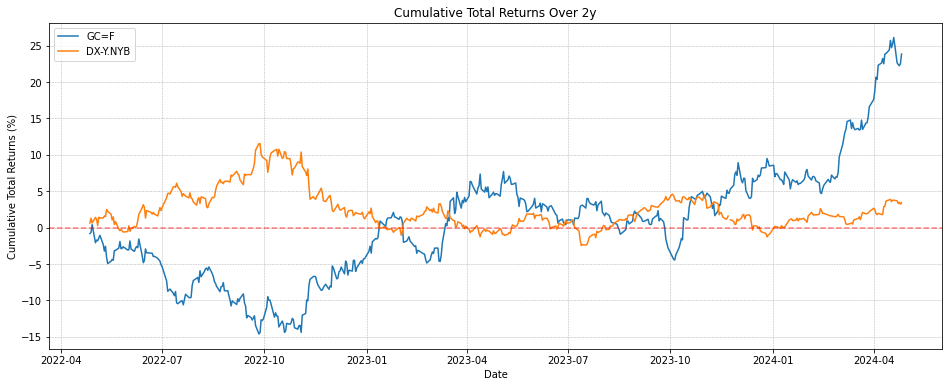

In [ ]:
comparison = TotalReturnComparison(['GC=F', 'DX-Y.NYB'], '2y')
# cumulative returns
cumulative_returns = comparison.calculate_cumulative_returns()
comparison.plot_cumulative_returns(cumulative_returns)

#### Data Pre-Processing

In [ ]:
data = pd.DataFrame({'Gold': gold_data, 'USD_Index': usd_index_data}).dropna()

#### Feature Selection

In [ ]:
X = data[['Gold']]
y = data['USD_Index']

#### Polynomial Feature Transformation

In [ ]:
poly_features = PolynomialFeatures(degree=3)
X_poly = poly_features.fit_transform(X)

#### Train-test Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=0)

#### Model Training & Predictions

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test)

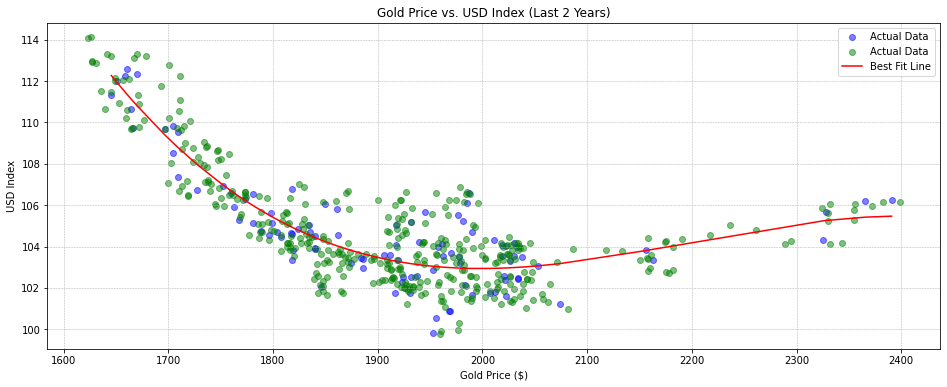

In [ ]:
plt.figure(figsize=(16, 6))
plt.scatter(X_test[:, 1], y_test, color='blue', label='Actual Data', alpha=0.5)
plt.scatter(X_train[:, 1], y_train, color='green', label='Actual Data', alpha=0.5)
sorted_zip = sorted(zip(X_test[:, 1], y_pred))
x_line, y_line = zip(*sorted_zip)
plt.plot(x_line, y_line, color='red', label='Best Fit Line')
plt.title('Gold Price vs. USD Index (Last 2 Years)')
plt.xlabel('Gold Price ($)')
plt.ylabel('USD Index')
plt.grid(True, which="both", ls="--", linewidth=0.5)
plt.legend()
plt.show()

#### Model Evaluation

In [ ]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

In [ ]:
print(f'MSE: {mse:.2f}')
print(f'RMSE: {rmse:.2f}')
print(f'R-squared: {r2:.2f}')
print(f'MAE: {mae:.2f}')

MSE: 1.49
RMSE: 1.22
R-squared: 0.79
MAE: 0.96


#### References:

https://www.bullionbypost.co.uk/gold-price/5-year-gold-price-chart-ounce-gbp/

https://www.macrotrends.net/1335/dollar-vs-gold-comparison-last-ten-years